In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import os
rc('text', usetex=True)
rc('font', family='serif')
% matplotlib inline

In [2]:
ab = str(raw_input("Model: "))
model = ab + "_millennium"
path = "/home/esteban/Escritorio/Practica/Data/" + model
os.chdir( path )

Model: G13


In [3]:
# Archivo con información de todos los halos (usando una muestra de densidad 10^-2 y con corte en sfr)
halos_data = np.load('halos_sfrcut_2.0.npy')

fofid = halos_data[:,0]         # Halo's fofid
logmass = halos_data[:,1]       # Halo's log mass
All = halos_data[:,2]           # Num of galaxies in the halo
Cent = halos_data[:,3]          # Num of Cent in the halo
Sats = halos_data[:,4]          # Num of Sats in the halo
x = halos_data[:,5]             # Halo x-position 

In [4]:
# Archivo con los datos del HOD usando el corte en sfr
hod_data= np.load('hod_sfrcut_2.0.npy')
bins = hod_data[:,0]
HOD = hod_data[:,1]
Cent_plot = hod_data[:,2]
Sats_plot = hod_data[:,3]
Dmin, Dmax = 10,15.
NBIN = 30
bin_width = (Dmax-Dmin)/NBIN
bins_left = bins - bin_width *.5

(-2, 3)

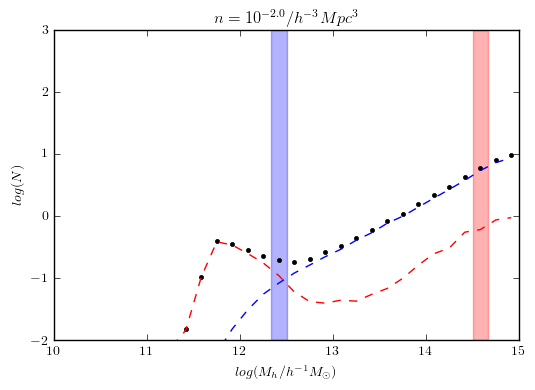

In [16]:
# Rangos a analizar 
mask1 = (logmass > bins_left[14]) & (logmass < bins_left[15]) # Span 1
mask2 = (logmass > bins_left[-3]) & (logmass < bins_left[-2]) # Span 2

plt.plot(bins, HOD, 'k.')
plt.plot(bins, Cent_plot, 'r--')
plt.plot(bins, Sats_plot, 'b--')
plt.axvspan(xmin=bins_left[14],xmax=bins_left[15],color='b',alpha=.3)
plt.axvspan(xmin=bins_left[-3],xmax=bins_left[-2],color='r',alpha=.3)
plt.xlabel(r"$log(M_h / h^{-1}M_{\odot})$", fontsize = 10)
plt.xlabel(r"$log(M_h / h^{-1}M_{\odot})$", fontsize = 10)
plt.title(r"$n = 10^{-2.0} /h^{-3} Mpc^3$")
plt.ylabel(r"$log(N)$", fontsize = 10)
plt.ylim(-2, 3)

In [7]:
# Seleccionamos los halos que se encuentran dentro de estos spans
All_mask1, All_mask2 = All[mask1], All[mask2]   
Sats_mask1, Sats_mask2 = Sats[mask1], Sats[mask2]

# Eliminamos los halos que no tienen galaxias (ya que estos no tienen galaxias que cumplan con el criterio de sfr (o de masa))
mask_zeros1, mask_zeros2 = All_mask1 == 0, All_mask2 == 0

All_mask1, All_mask2 = All_mask1[~mask_zeros1], All_mask2[~mask_zeros2]
Sats_mask1, Sats_mask2 = Sats_mask1[~mask_zeros1], Sats_mask2[~mask_zeros2]   

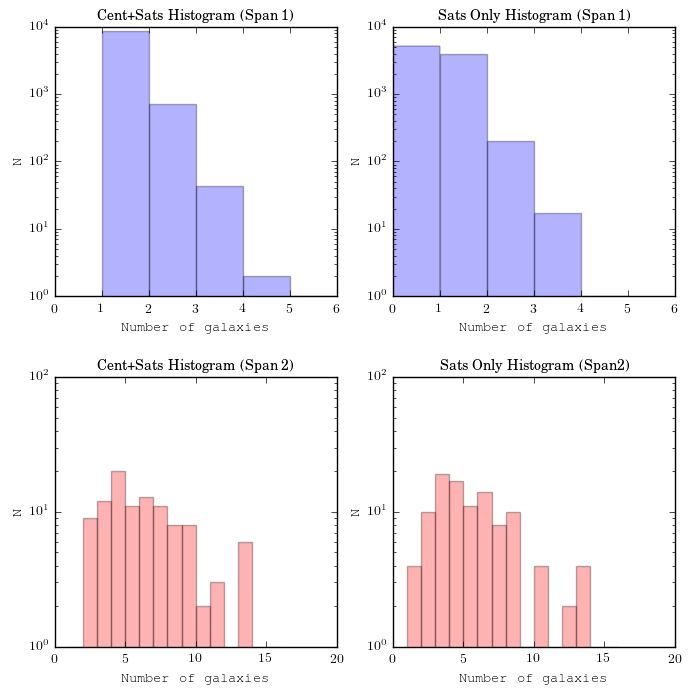

In [34]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize = [8,8])

ax[0,0].hist(All_mask1, bins = np.arange(10), alpha=.3, facecolor = 'b')
ax[0,0].set_title("Cent+Sats Histogram (Span 1)", fontsize = 10)

ax[0,1].hist(Sats_mask1, bins = np.arange(10), alpha = .3, facecolor = 'b')
ax[0,1].set_title("Sats Only Histogram (Span 1)", fontsize = 10)

ax[1,0].hist(All_mask2, bins = np.arange(100), alpha = .3, facecolor = 'r')
ax[1,0].set_title("Cent+Sats Histogram (Span 2)", fontsize = 10)

ax[1,1].hist(Sats_mask2, bins = np.arange(100), alpha = .3, facecolor = 'r')
ax[1,1].set_title("Sats Only Histogram (Span2)", fontsize = 10)

for row in ax:
    for col in row:
        col.set_xlabel(r"\tt{Number of galaxies}", fontsize = 10)
        col.set_ylabel(r"\tt{N}", fontsize = 10)
        col.set_yscale('log')

ax[0,0].set_xlim(0,6)
ax[0,1].set_xlim(0,6)     
ax[1,0].set_xlim(0,20)
ax[1,1].set_xlim(0,20)
f.subplots_adjust(hspace=.3)